## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_path)
study_df = pd.read_csv(study_results_path)

In [2]:
# check mouse data
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# check study data
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_df, study_df, how='left', on='Mouse ID')

# write merged mouse data to csv
combined_data_df.to_csv("data/merged_mouse_data.csv", index=True)
combined_data_df.head(12)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice in the DataFrame.
unique_mice_df = pd.DataFrame(combined_data_df["Mouse ID"].unique())
mice_count = len(unique_mice_df)
print(f"Number of unique mice: {mice_count}")

Number of unique mice: 249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_at_timepoint_df = combined_data_df.loc[combined_data_df["Timepoint"] == 0, :]
mice_at_timepoint_df = mice_at_timepoint_df.reset_index()
mice_at_timepoint_duplicated_df = mice_at_timepoint_df.loc[mice_at_timepoint_df.duplicated(subset="Mouse ID",keep=False) == True, ["Mouse ID","Timepoint"]]
mice_at_timepoint_duplicated_df.head()

,Mouse ID,Timepoint
107,g989,0
108,g989,0


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
columns = ["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"]
mice_at_timepoint_duplicated_df = mice_at_timepoint_df.loc[mice_at_timepoint_df.duplicated(subset="Mouse ID",keep=False) == True, columns]
mice_at_timepoint_duplicated_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.0,0
108,g989,Propriva,Female,21,26,0,45.0,0


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_1_df = mice_at_timepoint_df.drop(mice_at_timepoint_df.index[[108]])
clean_mouse_1_df = clean_mouse_1_df.drop('index', axis=1)
clean_mouse_1_df = clean_mouse_1_df.drop('Timepoint', axis=1)
clean_mouse_1_df = clean_mouse_1_df.drop('Metastatic Sites', axis=1)
clean_mouse_1_df = clean_mouse_1_df.set_index('Mouse ID')
   
# write clean mouse data to csv
clean_mouse_1_df.to_csv("data/clean_mouse_data.csv", index=True)
clean_mouse_1_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)
Mouse ID,,,,,
k403,Ramicane,Male,21,16,45.0
s185,Capomulin,Female,3,17,45.0
x401,Capomulin,Female,16,15,45.0
m601,Capomulin,Male,22,17,45.0
g791,Ramicane,Male,11,16,45.0


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_data_mice_count = len(clean_mouse_1_df)
print(f"Number of mice in the clean timepoint 0 DataFrame: {clean_data_mice_count}")

Number of mice in the clean timepoint 0 DataFrame: 249


In [10]:
# let's work on data sets with timepoint 45
mice_at_timepoint_df = combined_data_df.loc[combined_data_df["Timepoint"] == 45, :]
mice_at_timepoint_df = mice_at_timepoint_df.reset_index()

clean_mouse_df = mice_at_timepoint_df.drop('index', axis=1)
clean_mouse_df = clean_mouse_df.drop('Timepoint', axis=1)
clean_mouse_df = clean_mouse_df.drop('Metastatic Sites', axis=1)
clean_mouse_df = clean_mouse_df.set_index('Mouse ID')

# write clean mouse data to csv
clean_mouse_df.to_csv("data/clean_mouse_data_2.csv", index=True)
clean_data_mice_count = len(clean_mouse_df)
print(f"Number of mice in the clean timepoint 45 DataFrame: {clean_data_mice_count}")

Number of mice in the clean timepoint 45 DataFrame: 130


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_regimen_group = clean_mouse_df.groupby('Drug Regimen')

drug_regimen_mean = drug_regimen_group['Tumor Volume (mm3)'].mean()
drug_regimen_median = drug_regimen_group['Tumor Volume (mm3)'].median()
drug_regimen_variance = drug_regimen_group['Tumor Volume (mm3)'].var()
drug_regimen_standard_deviation = drug_regimen_group['Tumor Volume (mm3)'].std()
drug_regimen_sem = drug_regimen_group['Tumor Volume (mm3)'].sem()
drug_regimen_count = drug_regimen_group['Tumor Volume (mm3)'].count()

merged_df = pd.merge(drug_regimen_mean, drug_regimen_median, on="Drug Regimen")
merged_df = merged_df.rename(columns={"Tumor Volume (mm3)_x":"Mean (mm3)", "Tumor Volume (mm3)_y":"Median (mm3)"})

merged_df = pd.merge(merged_df, drug_regimen_variance, on="Drug Regimen")
merged_df = merged_df.rename(columns={"Tumor Volume (mm3)":"Variance (mm3)"})

merged_df = pd.merge(merged_df, drug_regimen_standard_deviation, on="Drug Regimen")
merged_df = merged_df.rename(columns={"Tumor Volume (mm3)":"Standard Deviation (mm3)"})

merged_df = pd.merge(merged_df, drug_regimen_sem, on="Drug Regimen")
merged_df = merged_df.rename(columns={"Tumor Volume (mm3)":"SEM (mm3)"})

merged_df = pd.merge(merged_df, drug_regimen_count, on="Drug Regimen")
merged_df = merged_df.rename(columns={"Tumor Volume (mm3)":"Completed Tests"})

merged_df.head(12)

,Mean (mm3),Median (mm3),Variance (mm3),Standard Deviation (mm3),SEM (mm3),Completed Tests
Drug Regimen,,,,,,
Capomulin,36.236114,37.311846,31.460537,5.608969,1.223977,21
Ceftamin,64.132421,64.299830,10.585242,3.253497,0.902358,13
Infubinol,65.755562,66.083066,11.787426,3.433282,1.144427,9
Ketapril,70.662958,69.872251,23.229260,4.819674,1.453186,11
Naftisol,69.265506,69.563621,26.079104,5.106770,1.416363,13
Placebo,68.084082,69.042841,20.098783,4.483167,1.351726,11
Propriva,66.258529,64.957562,24.967290,4.996728,1.888586,7
Ramicane,34.955595,34.848627,30.101010,5.486439,1.226805,20
Stelasyn,68.438310,69.299149,27.340818,5.228845,1.576556,11


## Bar Plots

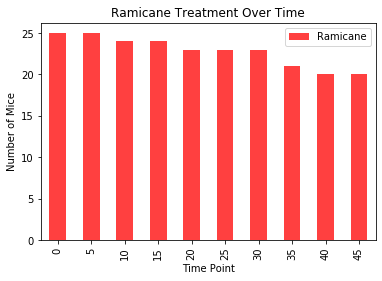

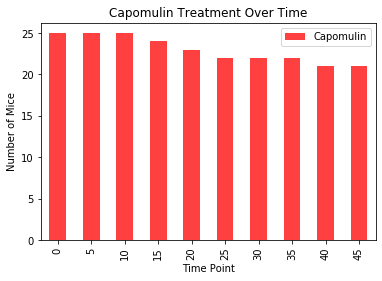

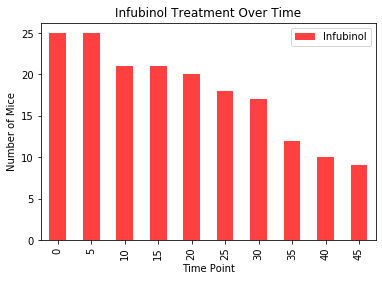

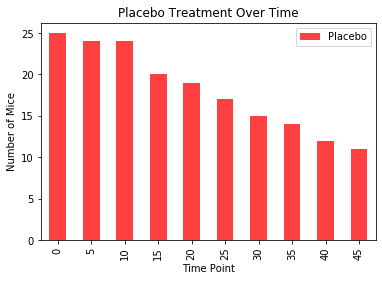

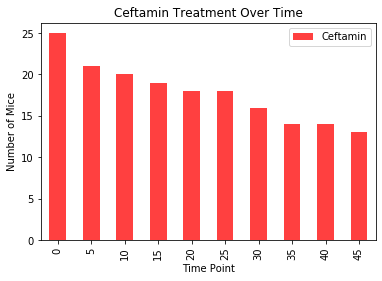

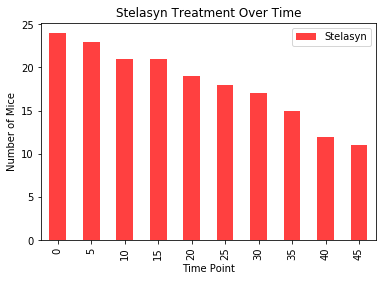

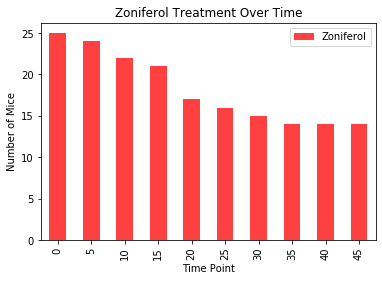

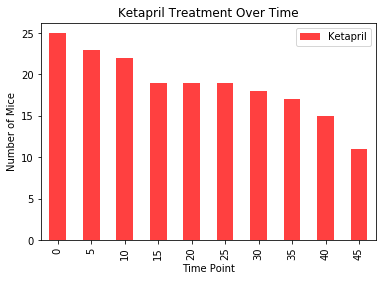

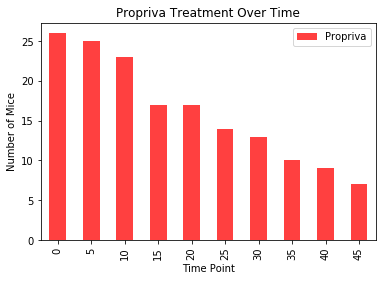

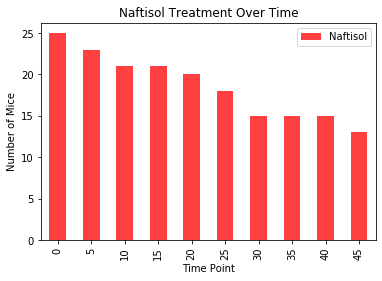

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
list_of_regimen = combined_data_df["Drug Regimen"].unique()

for index in range(len(list_of_regimen)):
    drug_regimen_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == list_of_regimen[index],:]
    grouped_regimen = drug_regimen_df.groupby("Timepoint")
    regimen_mice_df = grouped_regimen["Mouse ID"].count()
    regimen_mice_df = regimen_mice_df.reset_index()
    regimen_mice_df = regimen_mice_df.rename(columns={"Mouse ID":list_of_regimen[index]})
    regimen_mice_df = regimen_mice_df.set_index("Timepoint")
     
    regimen_mice_df.plot(kind="bar", facecolor="red", alpha=0.75, align="center")
    
    plt.xlabel("Time Point")
    plt.ylabel("Number of Mice")

    # Set a title for the chart
    plt.title(list_of_regimen[index]+" Treatment Over Time")

    plt.show()
    

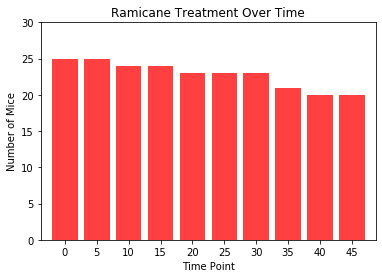

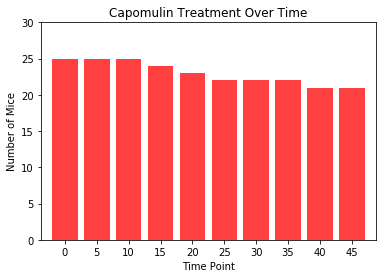

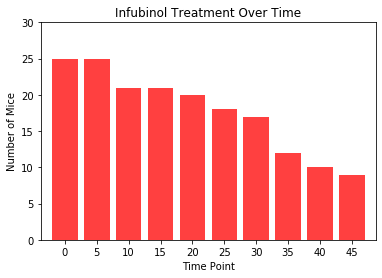

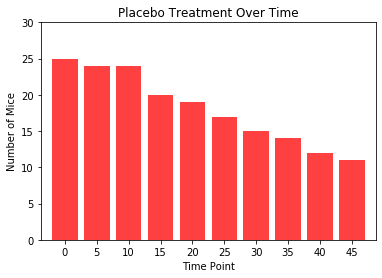

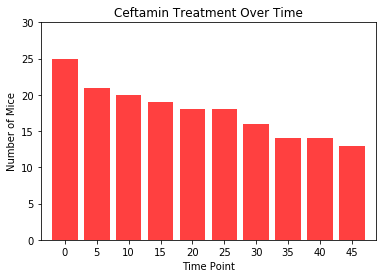

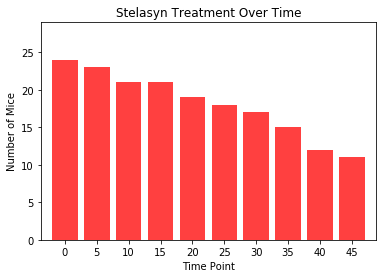

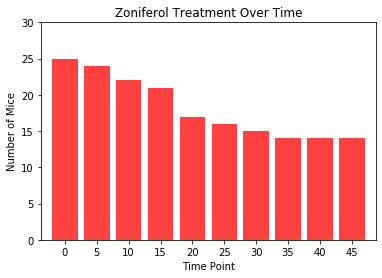

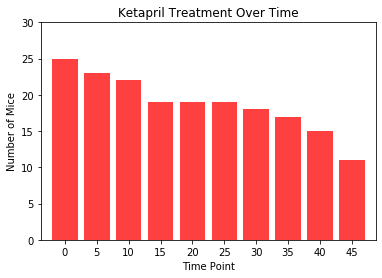

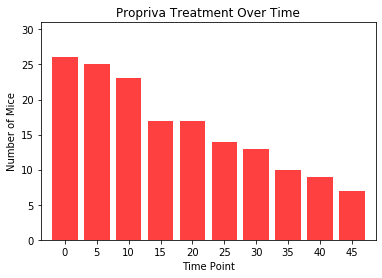

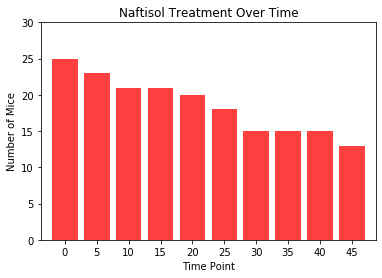

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
list_of_regimen = combined_data_df["Drug Regimen"].unique()

for index in range(len(list_of_regimen)):
    drug_regimen_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == list_of_regimen[index],:]
    grouped_regimen = drug_regimen_df.groupby("Timepoint")
    regimen_mice_df = grouped_regimen["Mouse ID"].count()
    regimen_mice_df = regimen_mice_df.reset_index()
    regimen_mice_df = regimen_mice_df.rename(columns={"Mouse ID":list_of_regimen[index]})
    #print(list_of_regimen[index])
    
    x_axis = np.arange(0, len(regimen_mice_df["Timepoint"].unique()))
    tick_locations = []
    for x in x_axis:
        tick_locations.append(x)

    plt.title(list_of_regimen[index]+" Treatment Over Time")
    plt.xlabel("Time Point")
    plt.ylabel("Number of Mice")

    plt.xlim(-0.75, len(regimen_mice_df["Timepoint"].unique())-.25)
    plt.ylim(0, max(regimen_mice_df[list_of_regimen[index]]) + 5)

    plt.bar(x_axis, regimen_mice_df[list_of_regimen[index]], facecolor="red", alpha=0.75, align="center")
    plt.xticks(tick_locations, regimen_mice_df["Timepoint"].unique())
    plt.show()

## Pie Plots

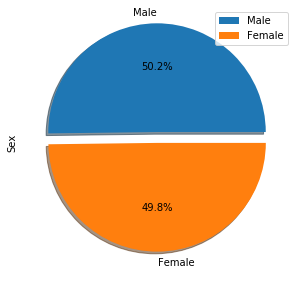

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

labels = ["Male", "Female"]

male_mice_df = clean_mouse_1_df.loc[clean_mouse_1_df["Sex"] == "Male",:]
male_mice_count = male_mice_df["Sex"].count()

female_mice_df = clean_mouse_1_df.loc[clean_mouse_1_df["Sex"] == "Female",:]
female_mice_count = female_mice_df["Sex"].count()
explode = (0.1, 0)

df = pd.DataFrame({'Sex': [male_mice_count, female_mice_count], 'radius': [male_mice_count, female_mice_count]}, index=labels)
plot = df.plot.pie(y='Sex', figsize=(5, 5),autopct="%1.1f%%", shadow=True,explode=explode)


(-1.1762367126898932,
 1.1254463310846248,
 -1.190308764526366,
 1.124996700756096)

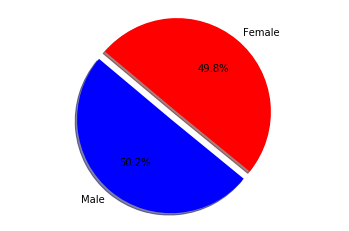

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart


# The values of each section of the pie chart
sizes = [male_mice_count,female_mice_count]

# The colors of each section of the pie chart
colors = ["blue", "red"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = clean_mouse_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 40.6583443125
The upper quartile of temperatures is: 68.8702959775
The interquartile range of temperatures is: 28.211951665000008
The the median of temperatures is: 63.53754596 
Values below -1.6595831850000096 could be outliers.
Values above 111.18822347500002 could be outliers.


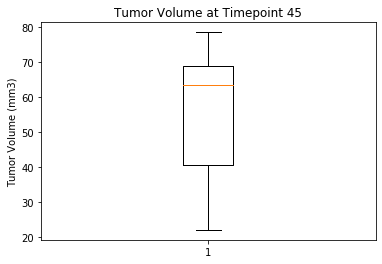

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
times = clean_mouse_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Timepoint 45')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(times)
plt.show()

## Line and Scatter Plots

In [18]:
import seaborn as sns

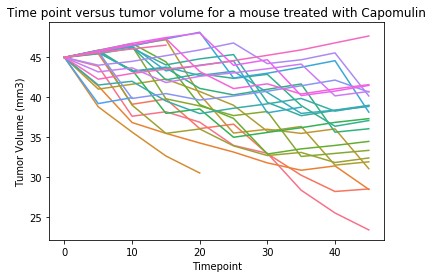

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_regimen_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Capomulin",:]
line_plot_df = capomulin_regimen_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]

graph = sns.lineplot(data=line_plot_df, x='Timepoint', y='Tumor Volume (mm3)',hue="Mouse ID", legend=None)
plt.title("Time point versus tumor volume for a mouse treated with Capomulin")
plt.show()


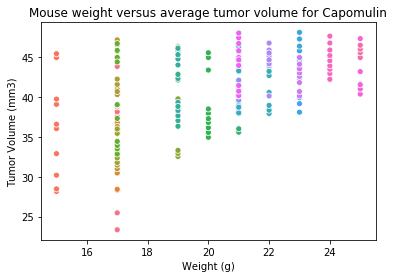

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_plot_df = capomulin_regimen_df[["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]

graph = sns.scatterplot(data=scatter_plot_df, x='Weight (g)', y='Tumor Volume (mm3)',hue="Mouse ID", legend=None)
plt.title("Mouse weight versus average tumor volume for Capomulin")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
